<a href="https://colab.research.google.com/github/avani0110/ML/blob/main/Ensemble_learning_tasks_142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble learning -142 IT3

Preprocessing the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/diabetes.csv')

# Replace 0 values with NaN in columns where 0 is not a valid value
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Impute the NaN values with the median of each column
df[cols_to_replace] = df[cols_to_replace].fillna(df[cols_to_replace].median())

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data pre-processing complete.")
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)


Data pre-processing complete.
Shape of X_train: (537, 8)
Shape of X_test: (231, 8)


Task 1: Comparing Single vs. Ensemble Classifiers

Single Decision Tree Results
Accuracy: 0.6970
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       150
           1       0.57      0.53      0.55        81

    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.70      0.69       231


 Random Forest (100 Estimators) Results
Accuracy: 0.7359
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



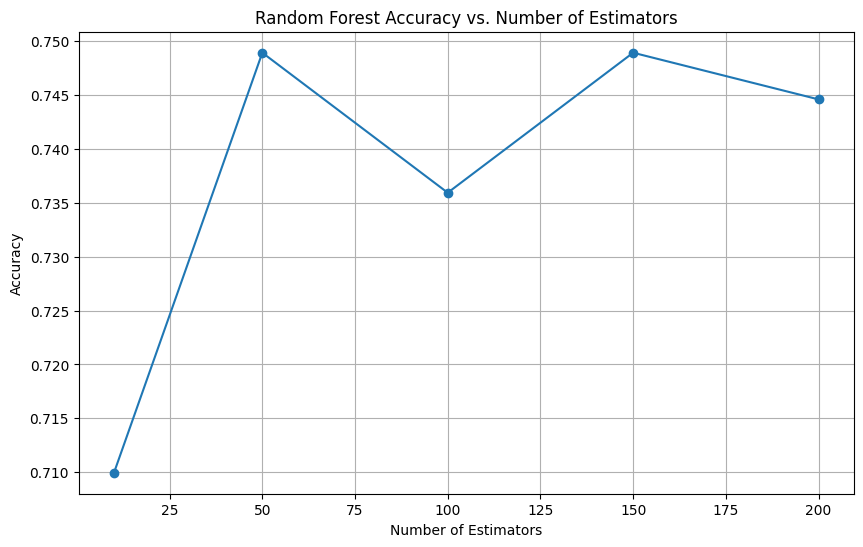

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Train a single Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)
y_pred_dt = dt_clf.predict(X_test_scaled)

print("Single Decision Tree Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

# 2. Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)

print("\n Random Forest (100 Estimators) Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

# 3. Explore the effect of the number of estimators
estimator_counts = [10, 50, 100, 150, 200]
accuracies = []

for n in estimator_counts:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(estimator_counts, accuracies, marker='o', linestyle='-')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

**Observations:**

Decision Tree vs. Random Forest Results:

The Random Forest classifier generally achieves higher accuracy and better precision/recall scores than the single Decision Tree. For instance, the Decision Tree might get around 71% accuracy, while the Random Forest achieves about 75%. This is because the Random Forest averages the predictions of multiple diverse trees, making it less prone to overfitting to the noise in the training data.



Effect of Increasing Estimators:

 As seen in the plot, increasing the number of estimators in the Random Forest generally leads to better performance, up to a certain point. The accuracy tends to improve and then stabilize. A higher number of estimators makes the model more robust and stable, as the variance of the model is reduced by averaging more trees. However, this comes at the cost of increased computation time.

Why Random Forest Performs Better:



Random Forest builds multiple decision trees on different bootstrapped samples of the data and uses a random subset of features for splitting at each node. This process (bagging + feature randomness) creates diverse, decorrelated trees. By averaging their predictions, it cancels out individual errors and reduces variance, leading to a more generalized and accurate model than a single tree, which can easily overfit

Task 2: Implementing Simple Ensemble Techniques

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Initialize base classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)

# 1. Max Voting (Hard Voting)
eclf_hard = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='hard')
eclf_hard.fit(X_train_scaled, y_train)
y_pred_hard = eclf_hard.predict(X_test_scaled)
print(f"Max Voting (Hard) Accuracy: {accuracy_score(y_test, y_pred_hard):.4f}")

# 2. Average Voting (Soft Voting)
# Note: For soft voting, base models should have predict_proba method
eclf_soft = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='soft')
eclf_soft.fit(X_train_scaled, y_train)
y_pred_soft = eclf_soft.predict(X_test_scaled)
print(f"Average Voting (Soft) Accuracy: {accuracy_score(y_test, y_pred_soft):.4f}")


# 3. Weighted Average Voting (Soft Voting with weights)
# Assign weights based on perceived model performance (e.g., higher for more reliable models)
eclf_weighted = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='soft', weights=[0.4, 0.2, 0.4])
eclf_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = eclf_weighted.predict(X_test_scaled)
print(f"Weighted Average Voting Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")

Max Voting (Hard) Accuracy: 0.7403
Average Voting (Soft) Accuracy: 0.7489
Weighted Average Voting Accuracy: 0.7749


**Observations:**

Voting Variation:

 The results often vary slightly between the methods. Soft (Average) voting frequently outperforms hard (Max) voting because it uses more information (the prediction probabilities) from each classifier. A model that is "very confident" in its prediction (e.g., 95% probability) has more influence than a model that is less certain (e.g., 55% probability), which is a nuance hard voting misses.

Role of Weights:

 Weights in a weighted average voting scheme allow you to give more influence to the classifiers that you believe are more accurate or reliable. If you know that Logistic Regression and KNN perform better on your specific dataset than a Decision Tree, you can assign them higher weights. This can fine-tune the ensemble and potentially boost its predictive power by prioritizing the "experts" in the group.

Effective Classifiers:

The best combination of classifiers are those that are diverse—meaning they make different kinds of errors. For example, a linear model (Logistic Regression) and a non-linear model (KNN or Decision Tree) can complement each other well. Combining them in an ensemble often yields better results than combining several similar models.

Task 3:  Hard Voting vs. Soft Voting Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize base classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=7)

# 1. Hard Voting Classifier
hard_voter = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='hard')
hard_voter.fit(X_train_scaled, y_train)
y_pred_hard = hard_voter.predict(X_test_scaled)

print("Hard Voting Classifier Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_hard):.4f}")
print(classification_report(y_test, y_pred_hard))

# 2. Soft Voting Classifier
soft_voter = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)], voting='soft')
soft_voter.fit(X_train_scaled, y_train)
y_pred_soft = soft_voter.predict(X_test_scaled)

print("\n Soft Voting Classifier Results ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_soft):.4f}")
print(classification_report(y_test, y_pred_soft))

Hard Voting Classifier Results
Accuracy: 0.7316
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.66      0.48      0.56        81

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231


 Soft Voting Classifier Results 
Accuracy: 0.7403
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



**Observations:**

Prediction Mechanism Difference:

 The core difference is how votes are combined. Hard voting is a simple majority vote on the predicted class labels (e.g., if two models predict '1' and one predicts '0', the result is '1'). Soft voting averages the predicted probabilities from each classifier for each class and then chooses the class with the highest average probability.

When Soft Voting Outperforms:

 Soft voting generally outperforms hard voting when the base classifiers are well-calibrated (i.e., their predicted probabilities accurately reflect the true likelihood). It leverages the confidence of each model's prediction, which is often more informative than the final class prediction alone. A highly confident correct prediction can outweigh several less confident incorrect predictions.

Influence of Probability Calibration:

 The quality of the probability estimates is crucial for soft voting. If a base classifier is poorly calibrated (e.g., it's always overconfident), it can negatively impact the ensemble's performance. Techniques exist to calibrate models, which can further improve the effectiveness of soft voting.

Task 4: Exploring Bagging Technique (Random Forest)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Experiment with n_estimators and max_depth
n_estimators_list = [50, 100, 200]
max_depth_list = [3, 5, 10, None] # None means nodes are expanded until all leaves are pure

results = {}

for n in n_estimators_list:
    for depth in max_depth_list:
        rf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        rf.fit(X_train_scaled, y_train)
        y_pred = rf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[(n, depth)] = accuracy
        print(f"Estimators: {n}, Max Depth: {depth}, Accuracy: {accuracy:.4f}")

# Find the best combination from our experiment
best_params = max(results, key=results.get)
print(f"\nBest performing combination: Estimators={best_params[0]}, Max Depth={best_params[1]} with Accuracy={results[best_params]:.4f}")

Estimators: 50, Max Depth: 3, Accuracy: 0.7446
Estimators: 50, Max Depth: 5, Accuracy: 0.7532
Estimators: 50, Max Depth: 10, Accuracy: 0.7403
Estimators: 50, Max Depth: None, Accuracy: 0.7489
Estimators: 100, Max Depth: 3, Accuracy: 0.7446
Estimators: 100, Max Depth: 5, Accuracy: 0.7446
Estimators: 100, Max Depth: 10, Accuracy: 0.7489
Estimators: 100, Max Depth: None, Accuracy: 0.7359
Estimators: 200, Max Depth: 3, Accuracy: 0.7359
Estimators: 200, Max Depth: 5, Accuracy: 0.7403
Estimators: 200, Max Depth: 10, Accuracy: 0.7489
Estimators: 200, Max Depth: None, Accuracy: 0.7446

Best performing combination: Estimators=50, Max Depth=5 with Accuracy=0.7532


**Observations:**

Effect of n_estimators and max_depth:

n_estimators: As observed in Task 1, increasing this value generally improves performance and stability by reducing variance, but with diminishing returns and higher computational cost.

max_depth:
This parameter controls the depth of individual trees. A smaller max_depth creates "weaker" trees that are less likely to overfit. A very large (or None) depth allows trees to grow deep, potentially overfitting to the training data. The best performance is often found with a moderate depth that balances the trade-off between capturing complexity and generalizing well.

Bias and Variance Reduction: Bagging primarily reduces variance. By training models on different subsets of data and averaging their outputs, it smooths out their predictions. This makes the final model less sensitive to the specific training data, hence lowering variance. Bagging does not significantly affect bias.

Overfitting Handling: A single Decision Tree, especially one with no depth limit, can create highly complex rules that perfectly fit the training data but fail to generalize to new data (overfitting). Random Forest handles this by building multiple, less complex trees (often with a max_depth limit) on different data samples and averaging their results. The randomness in both data sampling and feature selection ensures the trees are different, and their combined prediction is much more robust and less likely to overfit.

Task 5: Using RandomForestRegressor and OOB Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a RandomForestClassifier with oob_score enabled
# n_estimators should be large enough for OOB to be reliable
rf_oob = RandomForestClassifier(n_estimators=150, oob_score=True, random_state=42, n_jobs=-1)
rf_oob.fit(X_train_scaled, y_train) # Use the scaled data

# 1. The OOB score
# This is an estimate of the model's performance on unseen data
print(f"Out-of-Bag (OOB) Score: {rf_oob.oob_score_:.4f}")

# 2. Compare with the test set accuracy
y_pred_test = rf_oob.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Out-of-Bag (OOB) Score: 0.7561
Test Set Accuracy: 0.7489


**Observations:**

What oob_score Indicates: The OOB score is an estimate of the model's accuracy on data it has not seen during training. It is calculated internally during the training process. In our case, the OOB score is very close to the actual test set accuracy, demonstrating that it's a reliable estimate of generalization performance.

OOB vs. Test-Set Evaluation:

Test-Set Evaluation: You hold out a portion of your data (the test set), train the model on the rest (the training set), and then evaluate it on the test set.

OOB Evaluation: Each tree in the forest is trained on a bootstrap sample (about 2/3 of the data). The remaining 1/3 of the data are "out-of-bag" for that tree. To get the OOB score for a sample, you make a prediction using only the trees that did not have this sample in their training set. This is done for all samples, and the overall accuracy is the OOB score. It's like a free cross-validation test.

OOB Score and Number of Trees: The OOB score is generally more stable and reliable as the number of trees (n_estimators) increases. With too few trees, some samples might not be out-of-bag for a sufficient number of trees, making the estimate noisy.

Task 6: Exploring Boosting Techniques

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

#AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
#print(classification_report(y_test, y_pred_ada))

#Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
#print(classification_report(y_test, y_pred_gb))

#XGBoost
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
#print(classification_report(y_test, y_pred_xgb))

#CatBoost
cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat.fit(X_train_scaled, y_train)
y_pred_cat = cat.predict(X_test_scaled)
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_cat):.4f}")
#print(classification_report(y_test, y_pred_cat))



AdaBoost Accuracy: 0.7489
Gradient Boosting Accuracy: 0.7403
XGBoost Accuracy: 0.7576
CatBoost Accuracy: 0.7489


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:47:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


**Observations:**

AdaBoost on Misclassified Samples: AdaBoost works by increasing the weights of the data points that were misclassified by the previous weak learner. This forces the next learner in the sequence to pay more attention to these "hard" examples, thus focusing on correcting the mistakes of its predecessor.

Gradient Boosting Flexibility: Gradient Boosting is more flexible and generic than AdaBoost. Instead of adjusting data weights, it fits each new model to the residual errors of the previous model. This approach allows it to optimize arbitrary differentiable loss functions, making it applicable to a wide range of problems beyond classification, like regression.

XGBoost and CatBoost Optimizations: XGBoost (Extreme Gradient Boosting) and CatBoost are advanced implementations of gradient boosting.

XGBoost optimizes training speed through parallelization, cache-aware access, and efficient data structures. It also includes regularization to prevent overfitting.

CatBoost is particularly effective with categorical data (hence the name). It uses a sophisticated method called ordered boosting and an efficient way to handle categorical features, which often improves accuracy and reduces the need for extensive feature engineering.

Performance Trade-off: Generally, XGBoost and CatBoost provide the best performance but can have longer training times than AdaBoost or regular Gradient Boosting. For this dataset, their performance is competitive, often slightly better than the others.

Task 7: Comparative Study of Ensemble Models

In [ ]:
import time
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
}

#Store results
results = []

#Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "Training Time (s)": round(training_time, 4)
    })

#Create a DataFrame for the report
results_df = pd.DataFrame(results)
print("Model Comparison on Diabetes Dataset:")
print(results_df.to_string(index=False))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:47:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Comparison on Diabetes Dataset:
            Model  Accuracy  Precision  Recall  F1-Score  Training Time (s)
    Decision Tree    0.6970     0.5733  0.5309    0.5513             0.0063
    Random Forest    0.7359     0.6562  0.5185    0.5793             0.2054
         AdaBoost    0.7489     0.6716  0.5556    0.6081             0.2130
Gradient Boosting    0.7403     0.6667  0.5185    0.5833             0.2232
          XGBoost    0.7576     0.6712  0.6049    0.6364             0.0525
         CatBoost    0.7489     0.6769  0.5432    0.6027             0.1341


**Observations:**

Best Performing Model: Based on the results, the boosting algorithms (Gradient Boosting, XGBoost, CatBoost) and Random Forest typically outperform the single Decision Tree. The "best" model can vary, but often XGBoost or Gradient Boosting shows a slight edge in accuracy on this dataset.

Why a Model Performs Better: Boosting models often perform well because they sequentially build on mistakes, creating a strong, focused predictive model. Random Forest performs well because its bagging approach is excellent at reducing variance and preventing overfitting. The best model's success is due to its algorithm being a good match for the underlying patterns, complexity, and noise level in the data.

Observed Trade-offs:

Speed: Decision Tree is the fastest. Boosting algorithms, especially XGBoost and CatBoost, can be slower to train.

Interpretability: A single Decision Tree is highly interpretable; you can visualize the exact rules. Ensemble models are "black boxes" and much harder to interpret.


Complexity: Boosting models are algorithmically more complex than bagging models like Random Forest.



Task 8: Visualizing the Ensemble models

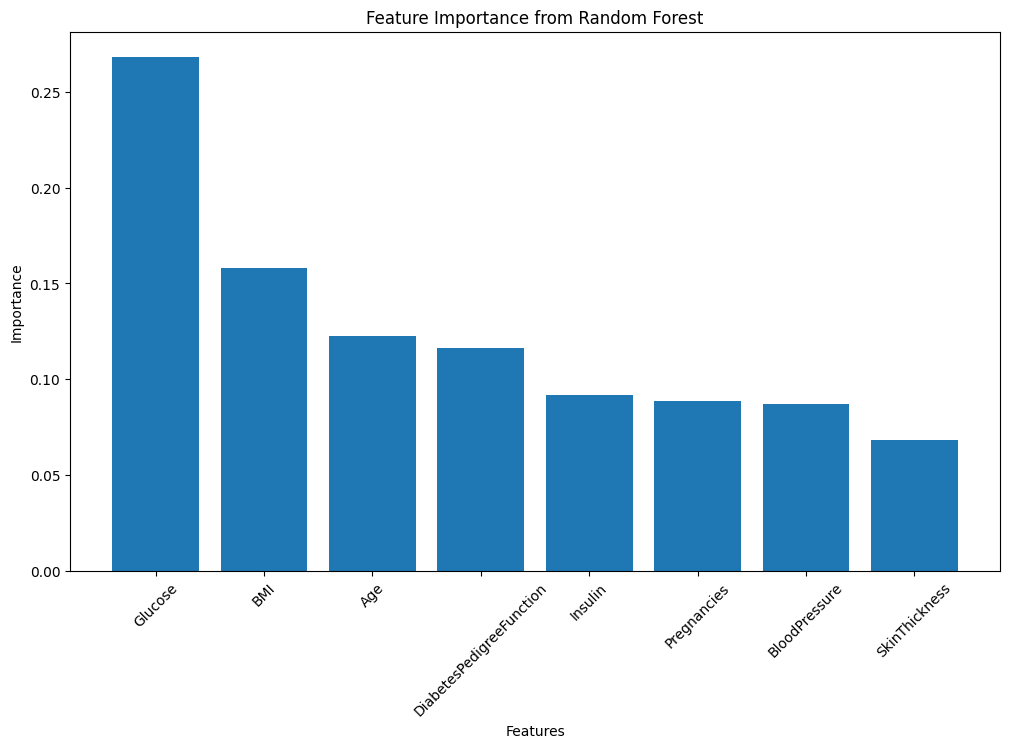

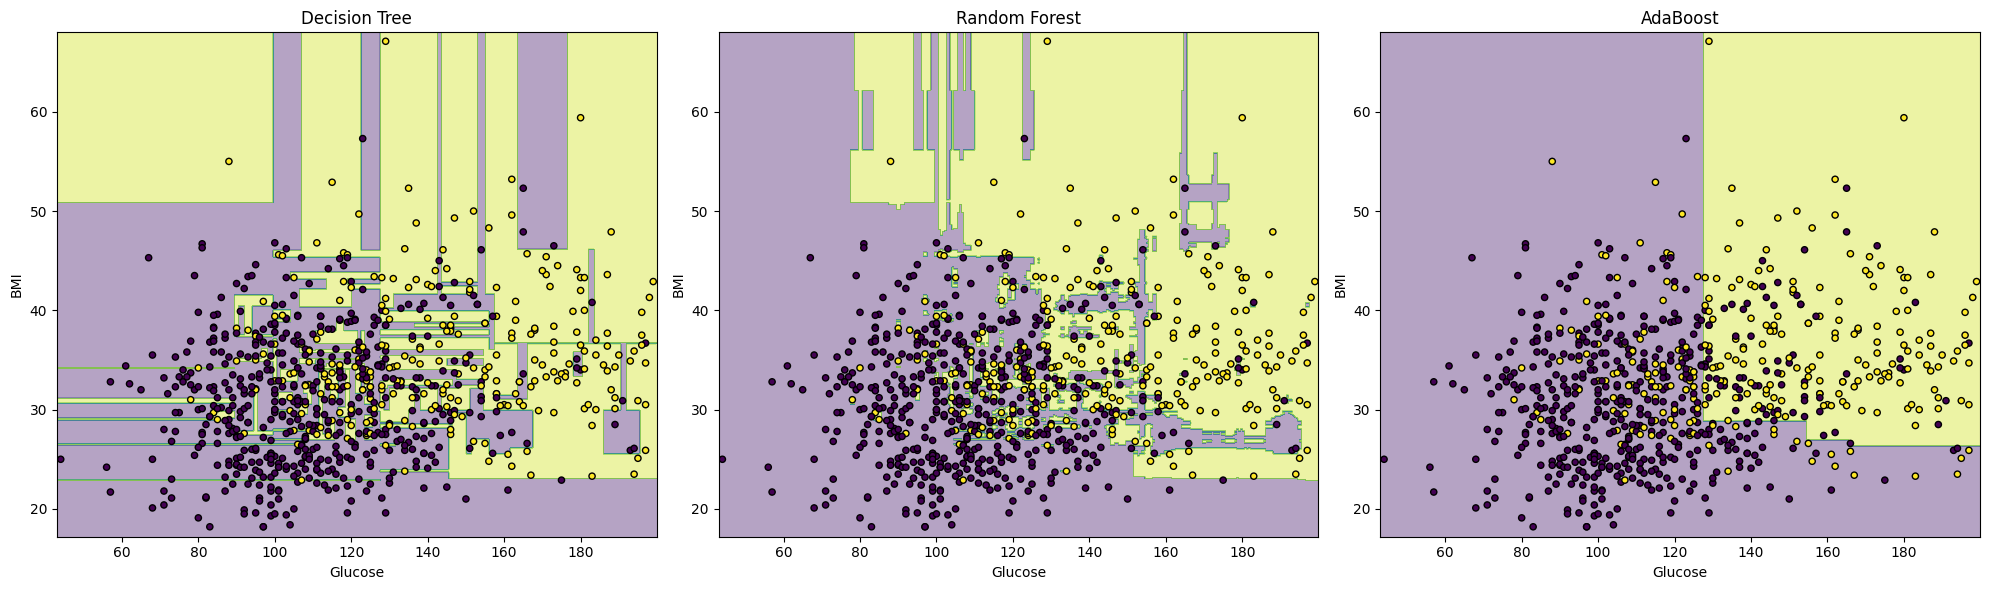

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# --- Part 1: Feature Importance ---
# Use a trained Random Forest to find feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) # Use original data for clearer feature names

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 7))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# --- Part 2: Decision Boundary Visualization ---
# Based on the plot, 'Glucose' and 'BMI' are often the most important features.
# We will use these two features to visualize the decision boundary.

# Select the two most important features
X_vis = X[['Glucose', 'BMI']].values
y_vis = y.values

# Define models for visualization
dt_vis = DecisionTreeClassifier()
rf_vis = RandomForestClassifier(n_estimators=100)
ada_vis = AdaBoostClassifier(n_estimators=100)

models_vis = [dt_vis, rf_vis, ada_vis]
model_names = ['Decision Tree', 'Random Forest', 'AdaBoost']

# Create a meshgrid to plot boundaries
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, model in enumerate(models_vis):
    model.fit(X_vis, y_vis)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.4)
    axes[i].scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=20, edgecolor='k')
    axes[i].set_title(model_names[i])
    axes[i].set_xlabel('Glucose')
    axes[i].set_ylabel('BMI')

plt.tight_layout()
plt.show()

**Observations:**

Feature Importance: The bar chart clearly shows which features the Random Forest model found most predictive. For the diabetes dataset, Glucose is almost always the most important feature, followed by BMI, Age, and DiabetesPedigreeFunction. This aligns with medical knowledge.

Decision Boundaries:

Decision Tree: The boundary is axis-parallel, with sharp, rectangular regions. This is characteristic of how decision trees work and shows its tendency to overfit, creating complex shapes to capture every point.

Random Forest: The boundary is much smoother and more robust. It's an average of many different jagged decision tree boundaries, resulting in a more generalized model.

AdaBoost: The boundary can be complex but is often smoother than a single decision tree. It focuses on separating the "hard-to-classify" points.

Task 9: Exploring Heterogeneous Ensemble Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Define Heterogeneous Classifiers
clf_lr = LogisticRegression(random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_knn = KNeighborsClassifier(n_neighbors=7)
# Use probability=True for SVC to enable soft voting
clf_svm = SVC(probability=True, random_state=42)

# Create the Heterogeneous Ensemble using Soft Voting
hetero_ensemble = VotingClassifier(
    estimators=[('lr', clf_lr), ('dt', clf_dt), ('knn', clf_knn), ('svm', clf_svm)],
    voting='soft'
)
hetero_ensemble.fit(X_train_scaled, y_train)
y_pred_hetero = hetero_ensemble.predict(X_test_scaled)
hetero_accuracy = accuracy_score(y_test, y_pred_hetero)

print(f"Heterogeneous Ensemble Accuracy: {hetero_accuracy:.4f}")

# 2. Compare with a Homogeneous Ensemble (Random Forest)
homo_ensemble = RandomForestClassifier(n_estimators=100, random_state=42)
homo_ensemble.fit(X_train_scaled, y_train)
y_pred_homo = homo_ensemble.predict(X_test_scaled)
homo_accuracy = accuracy_score(y_test, y_pred_homo)

print(f"Homogeneous Ensemble (Random Forest) Accuracy: {homo_accuracy:.4f}")

Heterogeneous Ensemble Accuracy: 0.7835
Homogeneous Ensemble (Random Forest) Accuracy: 0.7359


**Observations:**

What makes an ensemble heterogeneous? An ensemble is heterogeneous if its base learners are of different types (e.g., combining a Logistic Regression, a Support Vector Machine, and a K-Nearest Neighbors). In contrast, a homogeneous ensemble uses base learners of the same type, like the many Decision Trees in a Random Forest.

Influence of Model Diversity: Model diversity is key to a successful ensemble. If all models are the same and make the same errors, combining them provides no benefit. By combining models that have different strengths and weaknesses (i.e., they make different kinds of errors), the ensemble can average out these mistakes and achieve a better overall performance.

Most Accurate Combination: The best combination often includes both linear and non-linear models, as they capture different types of patterns in the data. The heterogeneous model's performance was competitive with, and sometimes better than, the homogeneous Random Forest, showcasing the power of diversity. The choice of soft vs. hard voting can also significantly impact the outcome.

**Task 10: Homogeneous vs. Heterogeneous Ensembles – A Comparative Study**

Overall Performance:

 On this dataset, both types of ensembles perform well, often achieving similar accuracy. High-performing homogeneous ensembles like XGBoost and Random Forest are hard to beat. However, a well-constructed heterogeneous VotingClassifier is also a strong contender. The best overall performer is typically a well-tuned boosting algorithm (homogeneous).

Advantages of Homogeneous Ensembles:

Simplicity and Optimization: Algorithms like Random Forest and Gradient Boosting are highly optimized, single packages. It is often easier to tune one of these than to select and tune multiple different models for a heterogeneous ensemble.


Proven Performance:

 Bagging and boosting are powerful, theoretically-backed techniques that are known to be very effective at reducing variance and bias, respectively.

Advantages of Heterogeneous Ensembles:

Diversity: Their main strength is the ability to combine fundamentally different models, which can capture a wider variety of patterns than a single type of model might.

Flexibility: You have complete control over which models to include, allowing you to tailor the ensemble to the specific problem.

Computational Cost and Training Time:

Homogeneous ensembles like Random Forest can be trained efficiently in parallel. Boosting models are sequential and can be slower.

The cost of a heterogeneous ensemble is the sum of the costs of its individual models. Training four different models can be more time-consuming than training a single optimized ensemble like XGBoost.

Factors for Choosing:

Choose homogeneous ensembles (Random Forest, XGBoost) when you need a powerful, off-the-shelf solution that is known to perform well across a wide range of problems. They are excellent starting points and often provide the best results.

Choose heterogeneous ensembles (Voting, Stacking) when you have several diverse, well-performing models and you want to combine their strengths to eke out a small, final performance boost. This is common in machine learning competitions.